In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xlsxwriter
import pandas_flavor as pf

In [2]:
header_row = 1  # Use the second row as the column names
skip_rows = [2, 3]  # Skip the first row, and the third and fourth rows

# Read the CSV file with the specified header row and skipping the specified rows
data1 = pd.read_csv("G:\Shared drives\FMA-G\C-CONSERVACIÓN\C1_Bosque Pehuen\C1.5_Bases de datos\Estacion Meterorológica\Linea de tiempo completa\CR800Series_Table 21092018_30012020.dat", header=header_row, skiprows=skip_rows, low_memory=False)
data2 = pd.read_csv("G:\Shared drives\FMA-G\C-CONSERVACIÓN\C1_Bosque Pehuen\C1.5_Bases de datos\Estacion Meterorológica\Linea de tiempo completa\CR800Series_Table1_13092019_21012021.dat", header=header_row, skiprows=skip_rows, low_memory=False)
data3 = pd.read_csv("G:\Shared drives\FMA-G\C-CONSERVACIÓN\C1_Bosque Pehuen\C1.5_Bases de datos\Estacion Meterorológica\Linea de tiempo completa\CR800Series_Table 01122020_11042022.dat", header=header_row, skiprows=skip_rows, low_memory=False)
data4 = pd.read_csv("G:\Shared drives\FMA-G\C-CONSERVACIÓN\C1_Bosque Pehuen\C1.5_Bases de datos\Estacion Meterorológica\Linea de tiempo completa\CR800Series_Table 03082021_12122022.dat", header=header_row, skiprows=skip_rows, low_memory=False)
data5 = pd.read_csv("G:\Shared drives\FMA-G\C-CONSERVACIÓN\C1_Bosque Pehuen\C1.5_Bases de datos\Estacion Meterorológica\Linea de tiempo completa\CR800Series_Table 08112022_18032024.dat", header=header_row, skiprows=skip_rows, low_memory=False)




In [3]:
print(data1.columns)

Index(['TIMESTAMP', 'RECORD', 'AirTC_Max', 'AirTC_Avg', 'AirTC_Min', 'RH_Max',
       'RH_Avg', 'RH_Min', 'WS_ms_Max', 'WS_ms_Avg', 'WS_ms_Min',
       'WindDir_Max', 'WindDir_Avg', 'WindDir_Min', 'WindDir_Std',
       'BP_mbar_Avg', 'T107_10cm_Max', 'T107_10cm_Avg', 'T107_10cm_Min',
       'T107_10cm_Std', 'T107_50cm_Max', 'T107_50cm_Avg', 'T107_50cm_Min',
       'T107_50cm_Std', 'Rain_mm_Tot', 'PTemp_C_Avg', 'PtoRocio_Avg',
       'BattV_Min', 'DT_Max', 'DT_Avg', 'DT_Min', 'Q_Max', 'Q_Min', 'TCDT_Max',
       'TCDT_Min', 'incomingLW_Avg', 'incomingSW_Avg', 'outgoingLW_Avg',
       'outgoingSW_Avg', 'albedo_Avg'],
      dtype='object')


In [3]:
dataframes = [data1, data2, data3, data4, data5]

# Concatenate all dataframes
merged_df = pd.concat(dataframes)

# Drop duplicates based on 'RECORD' and 'TIMESTAMP' columns
merged_df = merged_df.drop_duplicates(subset=['RECORD', 'TIMESTAMP'])

In [4]:
# Convert the column to TIMESTAMP format
merged_df['TIMESTAMP'] = pd.to_datetime(merged_df['TIMESTAMP'])

# Extract year, month, day, and time
merged_df['Year'] = merged_df['TIMESTAMP'].dt.year
merged_df['Month'] = merged_df['TIMESTAMP'].dt.month
merged_df['Day'] = merged_df['TIMESTAMP'].dt.day
merged_df['Time'] = merged_df['TIMESTAMP'].dt.time


In [5]:
print(merged_df['Month'].unique())

[ 9 10 11 12  1  2  3  4  5  6  7  8]


In [6]:
pivot_table = merged_df.pivot_table(values=['AirTC_Max', 'AirTC_Avg', 'AirTC_Min'], index='Month', aggfunc='mean')
print(pivot_table.T)

Month             1          2          3         4         5         6   \
AirTC_Avg  12.789443  13.763616  11.100131  8.329263  5.701077  2.728046   
AirTC_Max  13.108448  14.074766  11.398352  8.600111  5.954396  2.944660   
AirTC_Min  12.493070  13.472731  10.823682  8.078342  5.469070  2.530421   

Month            7         8         9         10        11         12  
AirTC_Avg  1.717963  2.536797  3.529382  5.777324  8.889829  11.240261  
AirTC_Max  1.967263  2.821692  3.812809  6.053924  9.173398  11.547807  
AirTC_Min  1.492116  2.280439  3.275659  5.524973  8.628270  10.953338  


In [7]:
# Assuming 'Year' and 'Month' are columns in your DataFrame
# Sum "Rain_mm_Tot" for each Year and Month
summed_rain = merged_df.groupby(['Year', 'Month'])['Rain_mm_Tot'].sum().reset_index()

# Get the mean of the total "Rain_mm_Tot" by month across all years
mean_rain = summed_rain[summed_rain['Rain_mm_Tot'] > 0].groupby('Month')['Rain_mm_Tot'].mean()

print(mean_rain)

Month
1      55.050000
2      30.233333
3      73.716667
4     143.300000
5     255.640000
6     449.500000
7     314.400000
8     273.780000
9     170.366667
10    158.950000
11    119.216667
12     47.850000
Name: Rain_mm_Tot, dtype: float64


In [8]:
# Create a pivot table with 'Year' as columns, 'Month' as index, and the sum of "Rain_mm_Tot" as values
pivot_table = summed_rain.pivot_table(values='Rain_mm_Tot', index='Month', columns='Year', aggfunc='sum', fill_value=0)

print(pivot_table)

Year    2018   2019   2020   2021   2022   2023  2024
Month                                                
1        0.0   32.6   38.9   91.9  143.3   22.2   1.4
2        0.0   20.7   49.1    6.6   58.3   12.8  33.9
3        0.0   47.4   54.2   36.0  132.9  108.8  63.0
4        0.0   67.6  118.7   63.2  272.4  194.6   0.0
5        0.0  384.7  188.1  284.8  146.8  273.8   0.0
6        0.0  459.5  478.6  338.6  435.2  535.6   0.0
7        0.0  396.2  286.6  175.3  204.1  509.8   0.0
8        0.0  298.5  206.3  319.3  153.8  391.0   0.0
9      157.6  112.6  114.0  101.5   58.6  477.9   0.0
10     331.3  144.6   71.0   76.2  195.4  135.2   0.0
11     256.2  120.6   37.4   64.3   60.7  176.1   0.0
12      66.0   41.3   73.9   20.8   62.0   23.1   0.0


In [9]:
# Define the conditions for each cardinal direction.
conditions = [
    (merged_df['WindDir_Avg'] < 22.5), 
    (merged_df['WindDir_Avg'] < 67.5),
    (merged_df['WindDir_Avg'] < 112.5),
    (merged_df['WindDir_Avg'] < 157.5),
    (merged_df['WindDir_Avg'] < 202.5),
    (merged_df['WindDir_Avg'] < 247.5),
    (merged_df['WindDir_Avg'] < 292.5),
    (merged_df['WindDir_Avg'] < 337.5),
    (merged_df['WindDir_Avg'] < 360)
]

choices = ['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW', 'N']

merged_df['WindDir_AvgText'] = np.select(conditions, choices)

In [11]:
# Check if the 'WindDir_AvgText' column has any missing values
missing_WindDir = merged_df['WindDir_AvgText'].isnull().any()

print(missing_WindDir)

False


In [12]:
print(merged_df['WindDir_AvgText'].unique())

['W' 'SW' 'NW' 'S' 'SE' 'E' 'NE' 'N']


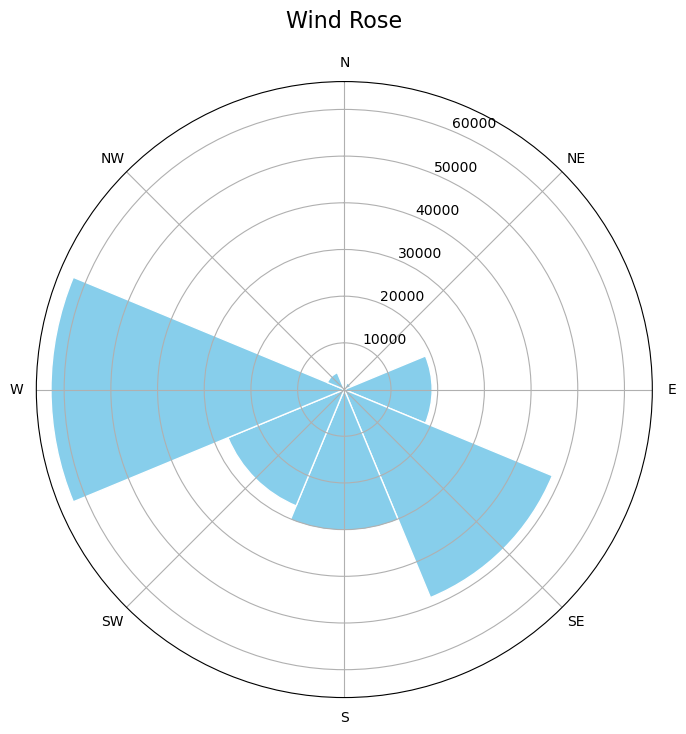

In [18]:

# Assuming your data is in a pandas DataFrame 'df'
wind_dir_text = merged_df['WindDir_AvgText']

# Create a dictionary to map wind direction text to numerical values
wind_dir_map = {
    'N': 0, 'NE': 45, 'E': 90, 'SE': 135,
    'S': 180, 'SW': 225, 'W': 270, 'NW': 315
}

# Convert the wind direction text to numerical values
wind_dir_values = [wind_dir_map.get(d, np.nan) for d in wind_dir_text]

# Remove any NaN values
wind_dir_values = [d for d in wind_dir_values if not np.isnan(d)]

# Calculate the frequency of wind directions in each sector
wind_freq = [wind_dir_values.count(d) for d in wind_dir_map.values()]

# Define the labels for each wind direction sector
wind_labels = list(wind_dir_map.keys())

# Create the wind rose plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})
ax.bar(np.deg2rad(list(wind_dir_map.values())), wind_freq, width=np.deg2rad(45), bottom=0.0, color='skyblue', edgecolor='white')
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

# Set the grid labels across the entire sector
theta_grid = np.deg2rad(list(wind_dir_map.values()))
theta_grid_labels = wind_labels
theta_grid_count = len(theta_grid)
theta_grid_end = np.linspace(theta_grid[0], theta_grid[-1], theta_grid_count)
ax.set_xticks(theta_grid_end)
ax.set_xticklabels(theta_grid_labels)

ax.set_title('Wind Rose', pad=20, fontsize=16)

plt.show()

In [19]:
print(wind_freq)

[3, 1535, 18812, 48225, 30196, 26966, 62826, 3918]


In [20]:
# Get the frequency of each 'WindDir_AvgText'
frequency = merged_df['WindDir_AvgText'].value_counts()

print("Frequency of each 'WindDir_AvgText':")
print(frequency)

# Get the average of 'WindDir_Avg' grouped by 'WindDir_AvgText'
average = merged_df.groupby('WindDir_AvgText')['WindDir_Avg'].mean()

print("\nAverage of 'WindDir_Avg' grouped by 'WindDir_AvgText':")
print(average)

Frequency of each 'WindDir_AvgText':
WindDir_AvgText
W     62826
SE    48225
S     30196
SW    26966
E     18812
NW     3918
NE     1535
N         3
Name: count, dtype: int64

Average of 'WindDir_Avg' grouped by 'WindDir_AvgText':
WindDir_AvgText
E      95.401670
N     123.160000
NE     58.682873
NW    297.899796
S     173.268900
SE    145.146072
SW    228.011919
W     270.431730
Name: WindDir_Avg, dtype: float64
